In [1]:
import pandas as pd
from pylab import *
import warnings
warnings.filterwarnings("ignore")
# 读取数据集
glass = pd.read_csv("C:/Users/lenovo/Desktop/2023年秋数据科学导论大作业/案例二数据集/glass.data", header=None)
glass.columns = ['Id', 'RI', 'Na', 'Mg',
                 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# 去掉Id列
ncol1 = len(glass.columns)
glass = glass.iloc[:, 1:ncol1]

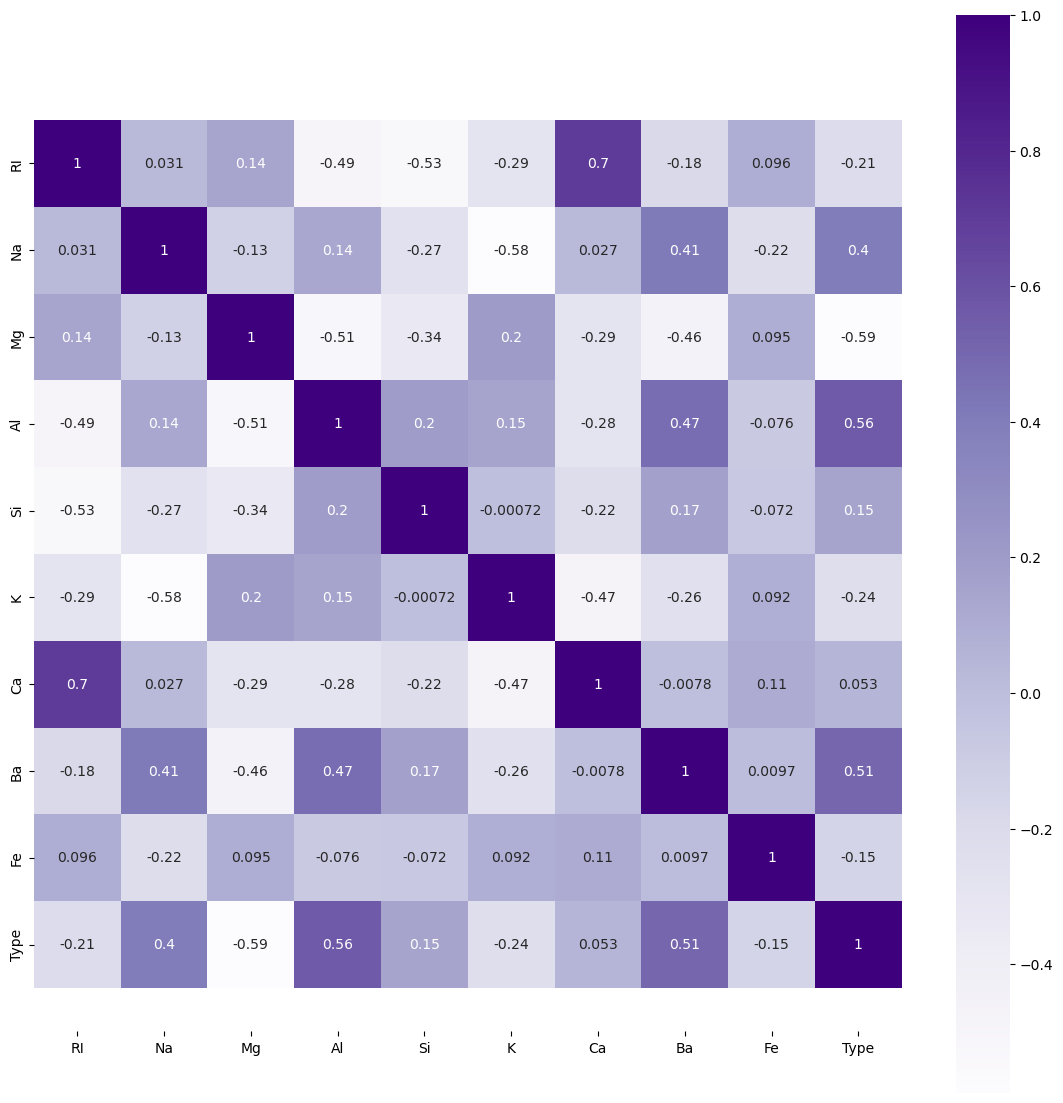

In [2]:
import seaborn as sn

corr_mean = glass.corr(method="spearman")
plt.figure(figsize=(14,14))
ax_mean = sn.heatmap(corr_mean, square=True, annot=True,cmap="Purples")
bottom, top = ax_mean.get_ylim()
ax_mean.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [3]:
columns_to_drop = ["K","RI"]
glass.drop(columns_to_drop, axis=1)

,Na,Mg,Al,Si,Ca,Ba,Fe,Type
0,13.64,4.49,1.10,71.78,8.75,0.00,0.0,1
1,13.89,3.60,1.36,72.73,7.83,0.00,0.0,1
2,13.53,3.55,1.54,72.99,7.78,0.00,0.0,1
3,13.21,3.69,1.29,72.61,8.22,0.00,0.0,1
4,13.27,3.62,1.24,73.08,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,9.18,1.06,0.0,7
210,14.92,0.00,1.99,73.06,8.40,1.59,0.0,7
211,14.36,0.00,2.02,73.42,8.44,1.64,0.0,7
212,14.38,0.00,1.94,73.61,8.48,1.57,0.0,7


In [4]:
from sklearn.model_selection import train_test_split
y = glass['Type']
del glass['Type']
x = glass
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

决策树

              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.73      0.79      0.76        14
           3       0.50      0.33      0.40         3
           5       0.80      1.00      0.89         4
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.79        43
   macro avg       0.63      0.67      0.65        43
weighted avg       0.73      0.79      0.76        43

[[10  1  0  0  0  0]
 [ 2 11  1  0  0  0]
 [ 1  1  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  2  0  1  0  0]
 [ 0  0  0  0  0  8]]
0.7906976744186046


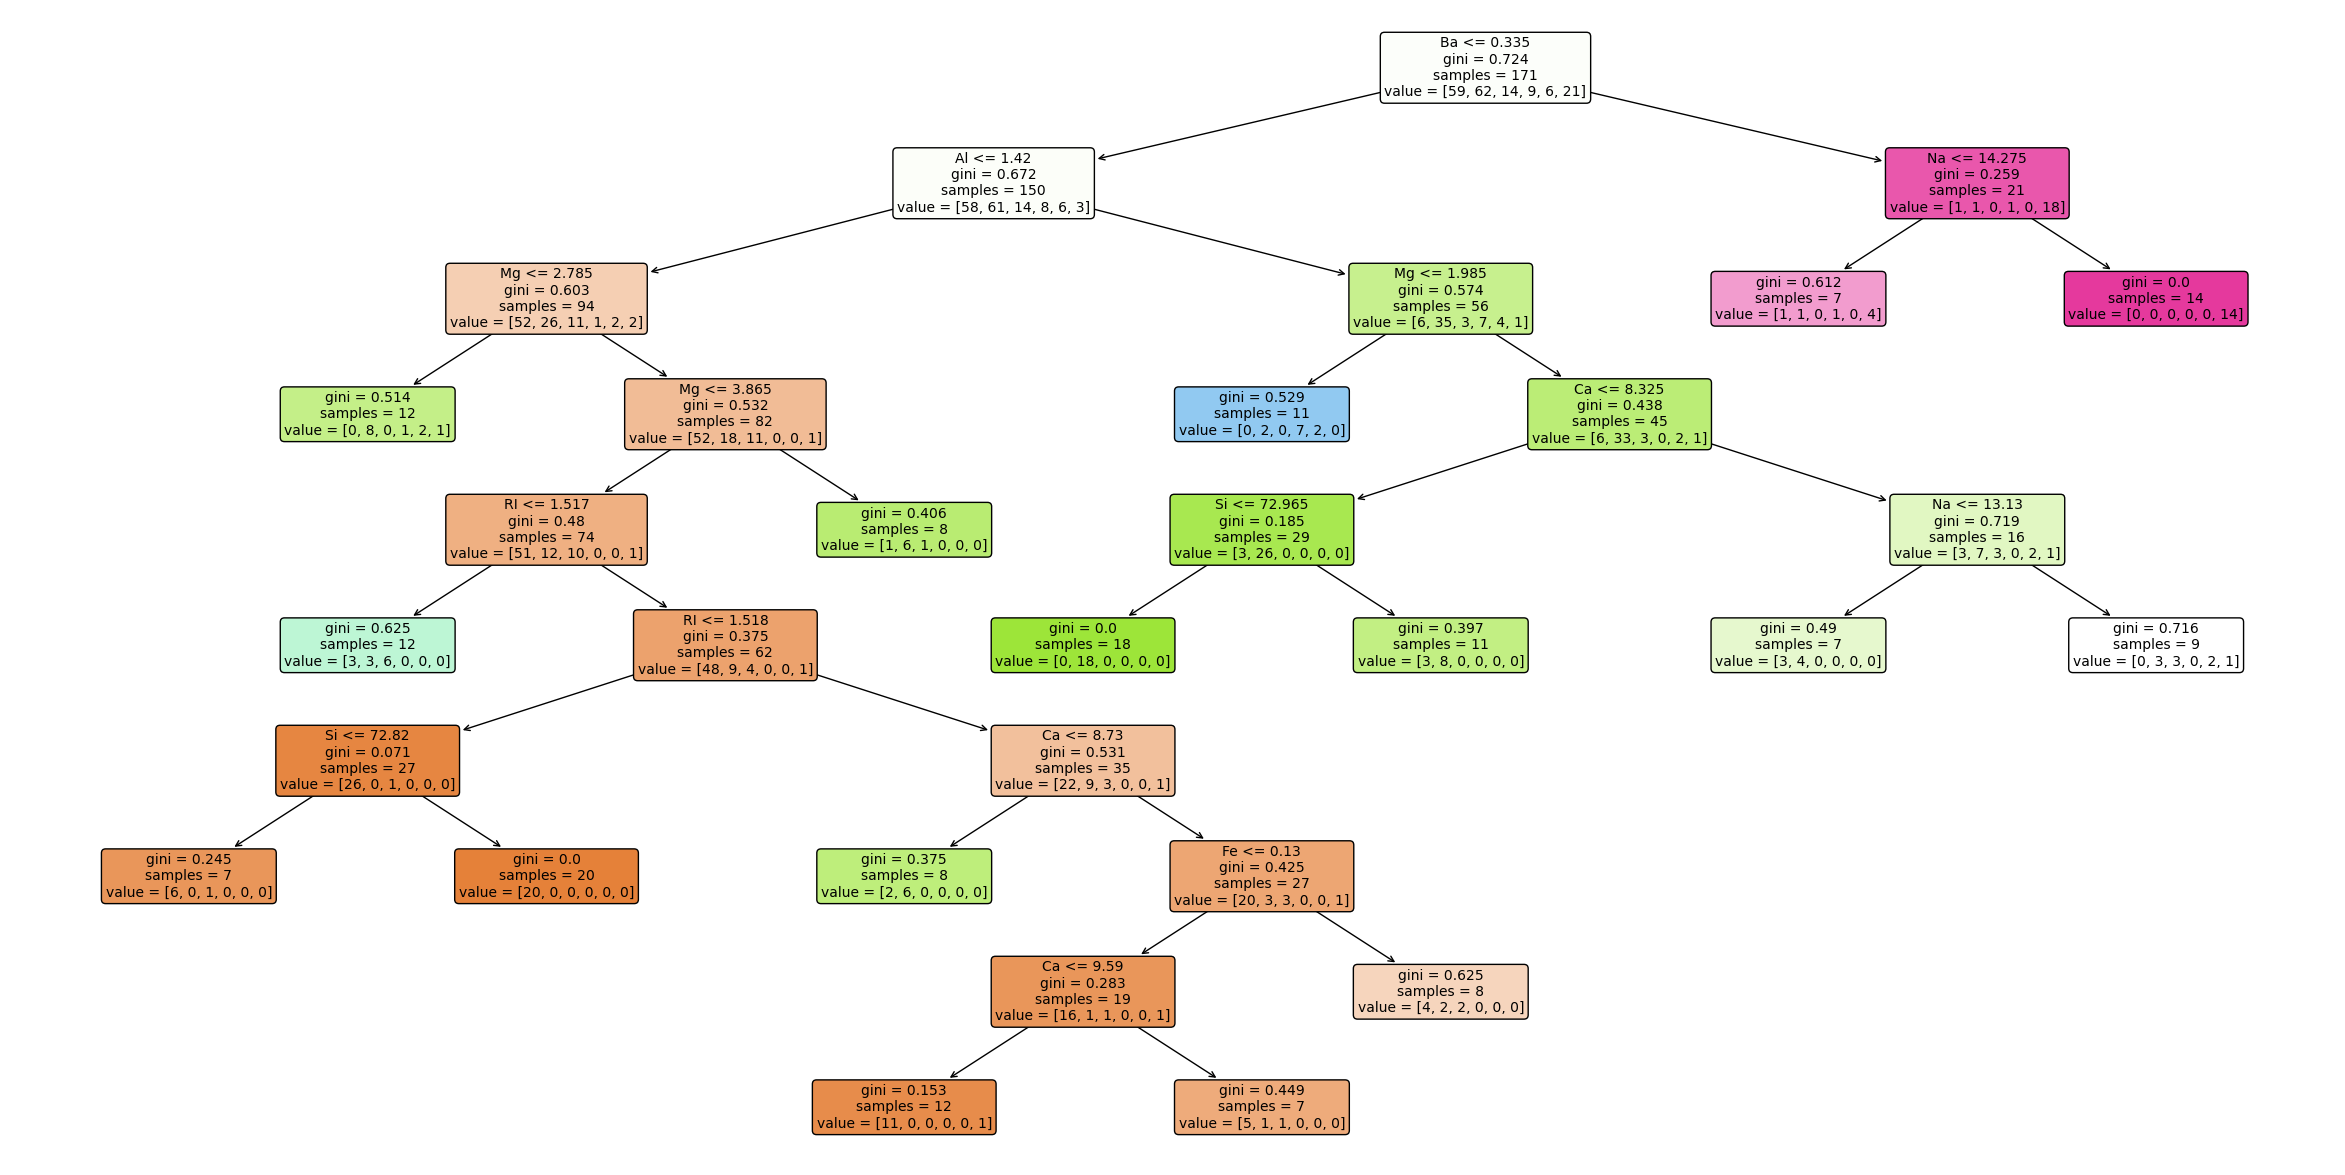

In [11]:
# 模型训练
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
credit_model = DecisionTreeClassifier(min_samples_leaf=7)
credit_model.fit(x_train, y_train)

# 模型性能评估
credit_pred = credit_model.predict(x_test)
print(metrics.classification_report(y_test, credit_pred))
print(metrics.confusion_matrix(y_test, credit_pred))
print(metrics.accuracy_score(y_test, credit_pred))

# 模型可视化
plt.figure(figsize=(30, 15))
tree.plot_tree(credit_model, feature_names=x_train.columns.tolist(),
               filled=True, rounded=True, fontsize=10)
plt.show()

knn

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 创建标准化对象
scaler = StandardScaler()

# 对训练集进行标准化
x_train_scaled = scaler.fit_transform(x_train)

# 对测试集进行标准化
x_test_scaled = scaler.transform(x_test)

# 创建k近邻分类器
knn_model = KNeighborsClassifier(n_neighbors=5)

# 训练模型
knn_model.fit(x_train_scaled, y_train)

# 预测测试集
y_pred = knn_model.predict(x_test_scaled)

# 模型性能评估
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.62      0.57      0.59        14
           3       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.60      0.62      0.60        43
weighted avg       0.64      0.70      0.66        43

[[10  1  0  0  0  0]
 [ 5  8  0  1  0  0]
 [ 1  2  0  0  0  0]
 [ 0  2  0  1  0  1]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
0.6976744186046512


svm

In [7]:
from sklearn import svm

# 创建SVM分类器
svm_classifier = svm.SVC(kernel='linear')

# 训练模型
svm_classifier.fit(x_train, y_train)

# 预测测试集
y_pred = svm_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.67      0.71      0.69        14
           3       0.00      0.00      0.00         3
           5       0.80      1.00      0.89         4
           6       1.00      0.67      0.80         3
           7       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.67      0.68      0.67        43
weighted avg       0.70      0.74      0.72        43

[[ 9  2  0  0  0  0]
 [ 3 10  0  0  0  1]
 [ 1  2  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  1  2  0]
 [ 0  1  0  0  0  7]]
0.7441860465116279


贝叶斯

In [8]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43

[[7 1 3 0 0 0]
 [9 3 0 1 0 1]
 [1 0 2 0 0 0]
 [0 3 0 1 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 8]]
0.5581395348837209


adaboost

In [9]:
from sklearn.ensemble import AdaBoostClassifier
# Create a base classifier (you can choose another classifier if you want)
base_classifier = DecisionTreeClassifier(min_samples_leaf=6)

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_classifier, n_estimators=150, random_state=42)

# Fit the model on the training data
adaboost_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.77      0.71      0.74        14
           3       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.79        43
   macro avg       0.89      0.74      0.77        43
weighted avg       0.82      0.79      0.78        43

[[10  1  0  0  0  0]
 [ 3 10  0  0  0  1]
 [ 2  0  1  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
0.7906976744186046


随机森林

In [10]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf_classifier = RandomForestClassifier()

# 训练模型
rf_classifier.fit(x_train, y_train)

# 预测测试集
y_pred = rf_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

[[11  0  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
0.8372093023255814
